## Import library

In [1]:
import pandas as pd
import numpy as np
from shapely.geometry import Point
import geopandas as gpd

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [9]:
retailer_product_target     = pd.read_csv('Data\shop_product_target.csv')
shop_info_with_geo          = pd.read_csv('Data\shop_info_with_geo.csv')
product_info                = pd.read_csv('Data\product_info.csv')

In [10]:
print('Total Retailer       : ',len(retailer_product_target))
print('Total Retailer Geo   : ',len(shop_info_with_geo))
print('product Info         : ',len(product_info))

Total Retailer       :  853731
Total Retailer Geo   :  832881
product Info         :  42


##  Product Target - Data

In [11]:
retailer_product_target.head()

,shop_code,prod_10,prod_2,prod_1,prod_14,prod_3,prod_11,prod_12,prod_4,prod_5,prod_6,prod_15,prod_16,prod_17,prod_7,prod_8,prod_9,prod_13,Total
0,f97c946,0.14,0.0,0.0,0.0,0.80,0.0,0.0,0.0,0.43,0.0,0.9,0.0,0.0,0.0,7.14,0.0,0.0,9.41
1,2a3843e,0.23,0.0,0.0,0.0,1.29,0.0,0.0,0.0,0.42,0.0,0.0,0.0,0.0,0.0,5.70,0.0,0.0,7.64
2,556b452,0.35,0.0,0.0,0.0,1.00,0.0,0.0,0.0,0.42,0.0,0.0,0.0,0.0,0.0,5.70,0.0,0.0,7.47
3,9f3e841,2.23,0.0,0.0,0.0,3.00,0.0,0.0,0.0,0.42,0.0,0.2,0.2,0.0,0.0,11.40,0.0,0.0,17.45
4,51f7f24,0.16,0.0,0.0,0.0,0.57,0.0,0.0,0.0,0.42,0.0,0.0,0.0,0.2,0.0,7.12,0.0,0.0,8.47


In [7]:
retailer_product_target.describe()

,prod_10,prod_2,prod_1,prod_14,prod_3,prod_11,prod_12,prod_4,prod_5,prod_6,prod_15,prod_16,prod_17,prod_7,prod_8,prod_9,prod_13,Total
count,735075.000000,735075.000000,735075.000000,735075.000000,735075.000000,735075.000000,735075.000000,735075.000000,735075.000000,735075.000000,735075.000000,735075.000000,735075.000000,735075.000000,735075.000000,735075.000000,735075.000000,735075.000000
mean,2.208702,0.347750,0.059513,0.011327,1.954620,0.053817,0.695323,0.082070,1.839834,0.000067,1.720992,0.759188,0.076207,2.381010,9.543506,2.137338,2.651889,26.523154
std,20.253837,4.626788,0.656747,0.192512,17.935641,0.977395,7.328612,1.811556,26.016114,0.009920,15.756075,8.695523,0.650922,30.513504,163.204455,45.823655,36.397929,256.634773
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.370000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.170000
50%,0.960000,0.000000,0.000000,0.000000,0.920000,0.000000,0.140000,0.000000,0.710000,0.000000,0.440000,0.000000,0.000000,0.000000,3.690000,0.000000,0.000000,13.250000
75%,1.940000,0.000000,0.000000,0.000000,1.780000,0.000000,0.630000,0.000000,1.700000,0.000000,1.550000,0.400000,0.000000,0.810000,8.560000,0.000000,0.000000,22.960000
max,5470.180000,2087.830000,157.100000,68.600000,5085.190000,487.530000,2588.820000,903.560000,11765.270000,3.130000,4252.610000,3440.100000,317.450000,8327.870000,62265.840000,14291.110000,14290.360000,91282.940000


In [8]:
retailer_product_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853731 entries, 0 to 853730
Data columns (total 19 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   shop_code  832881 non-null  object 
 1   prod_10    735075 non-null  float64
 2   prod_2     735075 non-null  float64
 3   prod_1     735075 non-null  float64
 4   prod_14    735075 non-null  float64
 5   prod_3     735075 non-null  float64
 6   prod_11    735075 non-null  float64
 7   prod_12    735075 non-null  float64
 8   prod_4     735075 non-null  float64
 9   prod_5     735075 non-null  float64
 10  prod_6     735075 non-null  float64
 11  prod_15    735075 non-null  float64
 12  prod_16    735075 non-null  float64
 13  prod_17    735075 non-null  float64
 14  prod_7     735075 non-null  float64
 15  prod_8     735075 non-null  float64
 16  prod_9     735075 non-null  float64
 17  prod_13    735075 non-null  float64
 18  Total      735075 non-null  float64
dtypes: float64(18), object(

##  Shop Information - Data

In [7]:
shop_info_with_geo.head()

,shop_code,organizer,place_nature,place_name,freq_type,shop_type,shop_style,shop_importance,ss_importance,visit_target,latitude,longitude,geometry,zila,upazila,division
0,6090092,org_1,plc_1,plcn_1,freq_1,shpt_1,shps_1,shpi_1,sshpi_1,NaN,23.803434,90.365784,POINT (90.36578369 23.80343437),Dhaka,Mirpur,Dhaka
1,858b66b,org_1,plc_1,plcn_2,freq_1,shpt_2,shps_1,shpi_1,sshpi_2,NaN,23.803434,90.365784,POINT (90.36578369 23.80343437),Dhaka,Mirpur,Dhaka
2,e4c2c50,org_1,plc_1,plcn_2,freq_1,shpt_1,shps_1,shpi_1,sshpi_3,NaN,23.803434,90.365784,POINT (90.36578369 23.80343437),Dhaka,Mirpur,Dhaka
3,72fdc17,org_1,plc_2,plcn_3,freq_1,shpt_2,shps_1,shpi_1,sshpi_1,NaN,23.803434,90.365784,POINT (90.36578369 23.80343437),Dhaka,Mirpur,Dhaka
4,077e560,org_1,plc_2,plcn_3,freq_1,shpt_2,shps_1,shpi_2,sshpi_4,NaN,23.803434,90.365784,POINT (90.36578369 23.80343437),Dhaka,Mirpur,Dhaka


In [16]:
shop_info_with_geo.describe()

,visit_target,latitude,longitude
count,2585.000000,719817.000000,719817.000000
mean,16.083559,23.929200,90.186992
std,6.357389,1.019808,0.964500
min,1.000000,20.863750,88.048347
25%,13.000000,23.234659,89.399399
50%,14.000000,23.868944,90.304329
75%,23.000000,24.618406,90.751923
max,27.000000,26.615427,92.490234


In [12]:
shop_info_with_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832881 entries, 0 to 832880
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   shop_code        832881 non-null  object 
 1   organizer        747714 non-null  object 
 2   place_nature     721322 non-null  object 
 3   place_name       747714 non-null  object 
 4   freq_type        747714 non-null  object 
 5   shop_type        747714 non-null  object 
 6   shop_style       747714 non-null  object 
 7   shop_importance  747714 non-null  object 
 8   ss_importance    747714 non-null  object 
 9   visit_target     2585 non-null    float64
 10  latitude         719817 non-null  float64
 11  longitude        719817 non-null  float64
 12  geometry         832881 non-null  object 
 13  zila             719679 non-null  object 
 14  upazila          719679 non-null  object 
 15  division         719679 non-null  object 
dtypes: float64(3), object(13)
memory usage

##  Product Information - Data

In [13]:
product_info.head()

,sku_id,sku_name,product_id,product_name,brand,type,packet_size,price_a,price_b,price_c,price_1,price_2,price_3,ingredient,freq,in_packet,total_volume,total_price
0,1,sku_1,1,prod_1,brand_1,type_1,29,13317.0,13495,13483.0,14.0,220.0,22.0,95.376333,22,27,190.0,25640.5
1,3,sku_2,3,prod_2,brand_1,type_1,29,13317.0,13495,13483.0,14.0,220.0,22.0,95.375524,22,27,400.0,53980.0
2,4,sku_3,4,prod_3,brand_2,type_2,29,10070.0,10195,10186.0,10.0,150.0,15.0,95.376705,22,27,180.0,18351.0
3,6,sku_4,6,prod_4,brand_2,type_3,29,10070.0,10195,10190.0,10.0,150.0,15.0,95.377057,22,27,20.0,2039.0
4,7,sku_5,7,prod_5,brand_3,type_4,29,6210.0,6295,6291.5,7.0,100.0,10.0,95.375829,22,27,260.0,16367.0


In [15]:
product_info.describe()

,sku_id,product_id,packet_size,price_a,price_b,price_c,price_1,price_2,price_3,ingredient,freq,in_packet,total_volume,total_price
count,42.000000,42.00000,42.00000,42.000000,42.000000,42.000000,37.000000,24.000000,24.000000,30.000000,42.0,42.000000,42.000000,42.000000
mean,47.309524,17.00000,37.50000,7619.166667,7716.666667,7711.107143,8.081081,138.750000,13.875000,95.556737,22.0,38.619048,91.357143,7537.241667
std,31.446034,12.44892,31.01868,3958.995163,4013.715307,4011.215897,3.796039,66.875127,6.687513,0.272779,0.0,43.338685,140.619851,13401.279276
min,1.000000,1.00000,29.00000,3459.500000,3500.000000,3496.500000,5.000000,60.000000,6.000000,95.374467,22.0,26.000000,0.000000,0.000000
25%,15.500000,6.25000,29.00000,3853.000000,3895.000000,3891.500000,5.000000,60.000000,6.000000,95.376107,22.0,27.000000,0.000000,0.000000
50%,50.500000,12.00000,29.00000,6210.000000,6295.000000,6291.500000,5.000000,150.000000,15.000000,95.377105,22.0,27.000000,1.000000,81.950000
75%,79.750000,29.50000,29.00000,11987.000000,12145.000000,12143.750000,10.000000,220.000000,22.000000,95.763412,22.0,27.000000,170.000000,10771.312500
max,90.000000,36.00000,148.00000,13317.000000,13495.000000,13483.000000,14.000000,220.000000,22.000000,96.041724,22.0,193.000000,482.000000,59378.000000


In [14]:
product_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sku_id        42 non-null     int64  
 1   sku_name      42 non-null     object 
 2   product_id    42 non-null     int64  
 3   product_name  42 non-null     object 
 4   brand         42 non-null     object 
 5   type          42 non-null     object 
 6   packet_size   42 non-null     int64  
 7   price_a       42 non-null     float64
 8   price_b       42 non-null     int64  
 9   price_c       42 non-null     float64
 10  price_1       37 non-null     float64
 11  price_2       24 non-null     float64
 12  price_3       24 non-null     float64
 13  ingredient    30 non-null     float64
 14  freq          42 non-null     int64  
 15  in_packet     42 non-null     int64  
 16  total_volume  42 non-null     float64
 17  total_price   42 non-null     float64
dtypes: float64(8), int64(6), object(

## Shop Information - Analytics
        -- Read Data using geopandas

In [31]:
shop_info_with_geo = pd.read_csv('Data\shop_info_with_geo.csv')
geometry = [Point(xy) for xy in zip(shop_info_with_geo['longitude'], shop_info_with_geo['latitude'])]
shop_info_with_geo = gpd.GeoDataFrame(shop_info_with_geo, geometry=geometry)

In [32]:
shop_info_with_geo.head()

,shop_code,organizer,place_nature,place_name,freq_type,shop_type,shop_style,shop_importance,ss_importance,visit_target,latitude,longitude,geometry,zila,upazila,division
0,6090092,org_1,plc_1,plcn_1,freq_1,shpt_1,shps_1,shpi_1,sshpi_1,NaN,23.803434,90.365784,POINT (90.36578 23.80343),Dhaka,Mirpur,Dhaka
1,858b66b,org_1,plc_1,plcn_2,freq_1,shpt_2,shps_1,shpi_1,sshpi_2,NaN,23.803434,90.365784,POINT (90.36578 23.80343),Dhaka,Mirpur,Dhaka
2,e4c2c50,org_1,plc_1,plcn_2,freq_1,shpt_1,shps_1,shpi_1,sshpi_3,NaN,23.803434,90.365784,POINT (90.36578 23.80343),Dhaka,Mirpur,Dhaka
3,72fdc17,org_1,plc_2,plcn_3,freq_1,shpt_2,shps_1,shpi_1,sshpi_1,NaN,23.803434,90.365784,POINT (90.36578 23.80343),Dhaka,Mirpur,Dhaka
4,077e560,org_1,plc_2,plcn_3,freq_1,shpt_2,shps_1,shpi_2,sshpi_4,NaN,23.803434,90.365784,POINT (90.36578 23.80343),Dhaka,Mirpur,Dhaka


In [33]:
pd.pivot_table(shop_info_with_geo, index='division', values=['shop_code'], aggfunc={'shop_code': 'count'})

,shop_code
division,
Barisal,35700
Chittagong,128751
Dhaka,220775
Khulna,80042
Mymensingh,50476
Rajshahi,87781
Rangpur,77832
Sylhet,38322


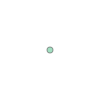

In [39]:
shop_info_with_geo['geometry'][0]

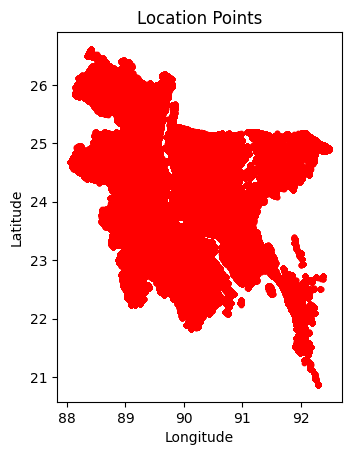

In [37]:
shop_info_with_geo.plot(marker='o', color='red', markersize=10)

plt.title('Location Points')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

<Axes: >

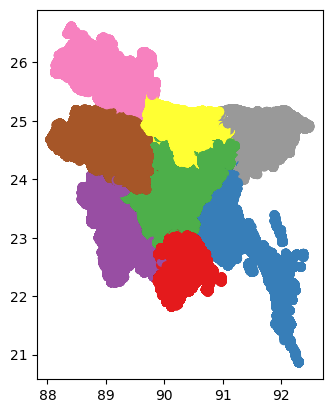

In [38]:
shop_info_with_geo.plot("division", cmap="Set1")  